# State of the Union Analysis

With the 2020 U.S. presidential campaign around the corner, I feeling rather political and thought I'd re-visit a project I had completed in my Data Science course I had completed a few years prior.

This time I wanted to add a twist on my work and include some cool data visualizations.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import shelve
import re #for string splitting

plt.style.use('seaborn-dark')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [3]:
speech_metadata = pd.DataFrame(columns = ['President', 'Speech', 'Date', 'Date (String)'])

def read_speech_meta(string): 
    vals = string.split(',')
    d = {}
    d['President'] = vals[0].strip()
    d['Speech'] = vals[1].strip()
    date_string = (vals[2] + vals[3]).strip()
    d['Date'] = datetime.datetime.strptime(date_string, '%B %d %Y')
    d['Date (String)'] = date_string
    return d

'''Custom function designed to read a list of strings that contain 
the speech name, speaker, and date corresponding to a Presidential speech.
Example: ['State of the Union Address', 'George Washington', 'January 8, 1790']'''

def read_speech_meta_list(str_list): 
    d = {}
    d['President'] = str_list[0].strip()
    d['Speech'] = str_list[1].strip()
    date_string = (str_list[2] + str_list[3]).strip()
    d['Date'] = datetime.datetime.strptime(date_string, '%B %d, %Y')
    d['Date (String)'] = date_string
    return d

SEPARATORS = '[\'\":\n\t,-.()%$;?!@#$^&_+=<>/\{}\[\] ]'

'''Removes all occurrences of the empty string from a list of strings'''
def remove_empty_strings(list_of_strings): 
    return list(filter(lambda elem: elem != '', list_of_strings)) 

'''Splits lines according to the SEPARATORS above and the python regex package.
Returns a list of all the words in the speech, with repeats.'''
def split_text_lines(list_of_lines): 
    all_words_with_repeats = []
    for line in list_of_lines: 
        split_line = remove_empty_strings(re.split(SEPARATORS, line))
        all_words_with_repeats += split_line
    return all_words_with_repeats

'''Returns a dictionary whose keys are POSSIBLE_WORDS. The value at each key 
is an integer which is the number of occurrences of that word in WORD_OCURRENCE_LIST'''
def word_count_dict(possible_words, word_occurrence_list): 
    count_dict = dict.fromkeys(possible_words, 0)
    for word in word_occurrence_list: 
        count_dict[word] += 1 
    return count_dict


In [4]:

'''In this cell, we read the meta-data of the speeches and store it in a dataframe.'''

addresses_df = pd.DataFrame(index=['President', 'Speech', 'Date', 'Date (String)'])
# addresses_df = addresses_df.fillna(0)
# addresses_df = addresses_df.dropna()

with open('data/stateoftheunion1790-2017.txt', 'r') as g:
    txt_file_chunks = g.read().split('***') 
    meta = txt_file_chunks[0].split('\n') #f[0] is the metadata entry. split by line. 
    contents_index = meta.index('CONTENTS') #get the index of the line that indicates the beginning of contents.
    meta = remove_empty_strings(meta[contents_index + 2:])
    for line in meta: 
        new_series = pd.Series(read_speech_meta(line))
        addresses_df = addresses_df.append(new_series, ignore_index=True)
# addresses_df = addresses_df.drop(labels=[0, 1, 2, 3])
addresses_df.dropna(inplace=True)
addresses_df.reset_index(drop=True, inplace=True)

In [6]:
'''Function to convert Date string in CSV file to Datetime object.
In Pandas, this is a Timestamp object.'''
str_to_date = lambda date_str: datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')


In [7]:
addresses_df.describe()


,Date,Date (String),President,Speech
count,227,227,227,227
unique,227,227,42,4
top,1976-01-19 00:00:00,December 4 1917,Franklin D. Roosevelt,State of the Union Address
freq,1,1,12,222
first,1790-01-08 00:00:00,NaN,NaN,NaN
last,2017-02-27 00:00:00,NaN,NaN,NaN


In [8]:
from dateutil.relativedelta import relativedelta

print('Date of first speech: ', addresses_df['Date'].min().date())
print('Date of last speech: ', addresses_df['Date'].max().date())
print('Time between these speeches: ', relativedelta(addresses_df['Date'].max().date(), 
                                                     addresses_df['Date'].min().date()))


Date of first speech:  1790-01-08
Date of last speech:  2017-02-27
Time between these speeches:  relativedelta(years=+227, months=+1, days=+19)


In [10]:

# This is a count of the number of addresses delivered on any given month
# addresses_df['Date'].iloc[0].day
import calendar

#initialize all counts to 0
date_count_dict = {x:0 for x in range(1, 13)}

for date in addresses_df['Date']: 
    date_count_dict[date.month] += 1
    
#intialize lists to be used in plotting
month_names = []
month_counts = []

#print 
for month_num in range(1, 13):
    name = calendar.month_name[month_num]
    count = date_count_dict[month_num]
    month_names.append(name)
    month_counts.append(count)
    print('{}: {}'.format(name, count))

January: 75
February: 12
March: 0
April: 0
May: 0
June: 0
July: 0
August: 0
September: 2
October: 3
November: 11
December: 124


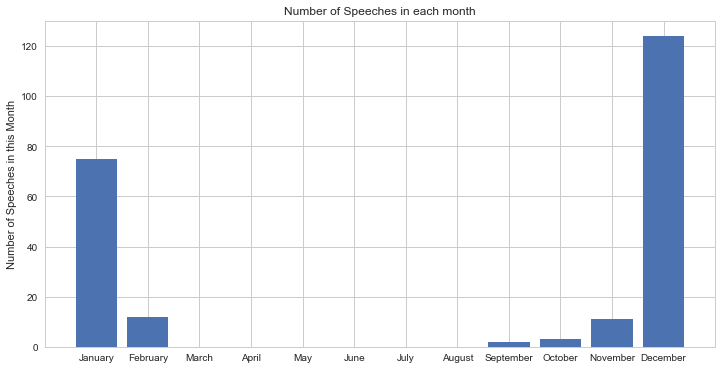

In [12]:

# And this is a plot of these:

plt.figure(figsize=(12, 6))

y_pos = np.arange(len(month_names))

plt.bar(y_pos, month_counts)
plt.xticks(y_pos, month_names)
plt.ylabel('Number of Speeches in this Month')
plt.title('Number of Speeches in each month')
#plt.savefig('fig/addresses_month.png');
plt.show();